In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
import re
import string
import nltk
from sklearn.preprocessing import LabelEncoder
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv("Test.csv")
subm = pd.read_csv("SampleSubmission.csv")
label_cols = ['Alcohol', 'Depression', 'Drugs', 'Suicide']

In [3]:
train.head(50)

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression
5,V6VSDJ5I,What are the effects of depression to ones health,Depression
6,9736J4UE,Why is everything so hard to deal with in this...,Depression
7,AY8L479Y,I feel emotionally overwhelmed,Depression
8,OSFJV5EC,How to manage taking alcohol?,Alcohol
9,U4SGUGGM,Is heaven open for us who smoke bhang?,Drugs


# Encode

In [4]:
le = LabelEncoder()
train['label_encoded'] = 1
train.head(50)

,ID,text,label,label_encoded
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression,1
1,9JDAGUV3,Why do I get hallucinations?,Drugs,1
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression,1
3,6UY7DX6Q,Why is life important?,Suicide,1
4,FYC0FTFB,How could I be helped to go through the depres...,Depression,1
5,V6VSDJ5I,What are the effects of depression to ones health,Depression,1
6,9736J4UE,Why is everything so hard to deal with in this...,Depression,1
7,AY8L479Y,I feel emotionally overwhelmed,Depression,1
8,OSFJV5EC,How to manage taking alcohol?,Alcohol,1
9,U4SGUGGM,Is heaven open for us who smoke bhang?,Drugs,1


# Pivot Table

In [5]:
train = train.pivot_table('label_encoded', ['ID', 'text'], 'label')
train.reset_index( drop=False, inplace=True )
train.reindex(['ID', 'text', 'Alcohol', 'Depression', 'Drugs', 'Suicide'], axis=1)
del train.columns.name
train.replace(np.nan, 0, inplace=True)
train[label_cols] = train[label_cols].astype(int)
train

,ID,text,Alcohol,Depression,Drugs,Suicide
0,019YKKY0,"I feel bad about myself, I dont want to intera...",0,1,0,0
1,03TVUJ9J,"I feel empty,absent minded",0,1,0,0
2,09UQ1YVQ,I went bankrupt because of alcohol,1,0,0,0
3,0HK6V5IQ,I am bored,0,1,0,0
4,0KPI3LLQ,How to avoid bad company?,1,0,0,0
5,0LPO6TKU,What should i do to get out of depression?,0,1,0,0
6,0OSLJ1HL,Where can i get money to be drinking daily?,1,0,0,0
7,0QXYZFYQ,I feel like I am a nobody,0,1,0,0
8,0RFTD03Y,How to deal and overcome bad situation,0,0,0,1
9,0RLWLLGO,How can I stop this addiction,1,0,0,0


# Number Of Comments Per Category

In [6]:
#df_stats = pd.DataFrame(pd.value_counts(train['label']).rename_axis('category').reset_index(name='number_of_comments'))
#df_stats
df_toxic = train.drop(['ID', 'text'], axis=1)
counts = []
categories = list(label_cols)
for i in categories:
    counts.append((i, df_toxic[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats


,category,number_of_comments
0,Alcohol,140
1,Depression,352
2,Drugs,58
3,Suicide,66


# Statistics

In [7]:
lens = train.text.str.len()
lens.mean(), lens.max(), lens.min()

(39.813311688311686, 196, 8)

# Distribution of words in the comments

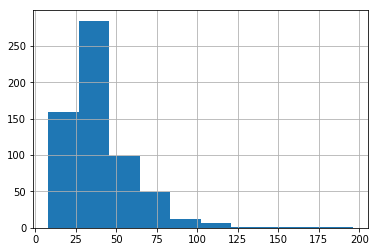

In [8]:
lens.hist();

# Multiple Categories Per Comment

Text(0.5, 0, '# Of Categories')

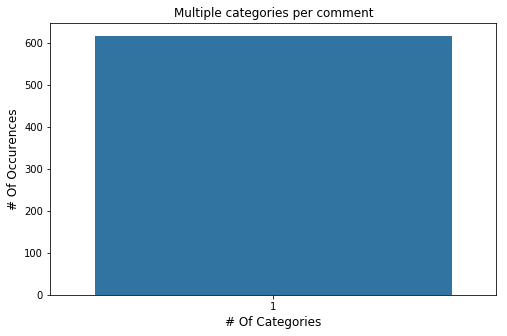

In [9]:
rowsums = train.iloc[:,2:].sum(axis=1)
x = rowsums.value_counts()

#plot
plt.figure(figsize=(8, 5))
ax = sb.barplot(x.index, x.values)
plt.title('Multiple categories per comment')
plt.ylabel('# Of Occurences', fontsize=12)
plt.xlabel('# Of Categories', fontsize=12)

# Comments without text

In [10]:
print(train['text'].isnull().sum())

0


Text(0.5, 0, 'Category')

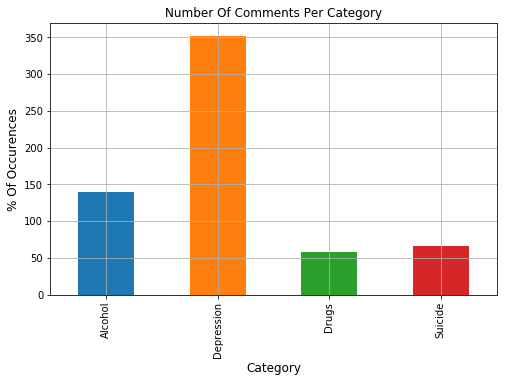

In [11]:
df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8,5))
plt.title('Number Of Comments Per Category')
plt.ylabel('% Of Occurences', fontsize=12)
plt.xlabel('Category', fontsize=12)

In [12]:
COMMENT = 'text'

In [13]:
re_tok =  re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s):
    return re_tok.sub(f' \1 ', s).split()

In [14]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize, stop_words=stopwords, min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1, smooth_idf=1, sublinear_tf=1)
train_term_doc = vec.fit_transform(train[COMMENT])
#This is where you would add other features suhc as Body Length, Punct Count etc
#X_tfidf_features = pd.concat([train['body_len_transformed'], train['body_punct_transformed'], pd.DataFrame(X_tfidf.toarray())], axis =1)
test_term_doc = vec.transform(test[COMMENT])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['\x01'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [15]:
train_term_doc, test_term_doc

(<616x252 sparse matrix of type '<class 'numpy.float64'>'
 	with 2266 stored elements in Compressed Sparse Row format>,
 <309x252 sparse matrix of type '<class 'numpy.float64'>'
 	with 1039 stored elements in Compressed Sparse Row format>)

Here's the basic naive bayes feature equation

In [16]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [17]:
x = train_term_doc
test_x = test_term_doc

Fit a model for one dependent at a time

In [18]:
def get_model(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=5, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [19]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_model(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit Alcohol
fit Depression
fit Drugs
fit Suicide


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


And finally, create the submission file.

In [20]:
submid = pd.DataFrame({'id': subm["ID"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = label_cols)], axis=1)
submission.to_csv('Submission-RF.csv', index=False)